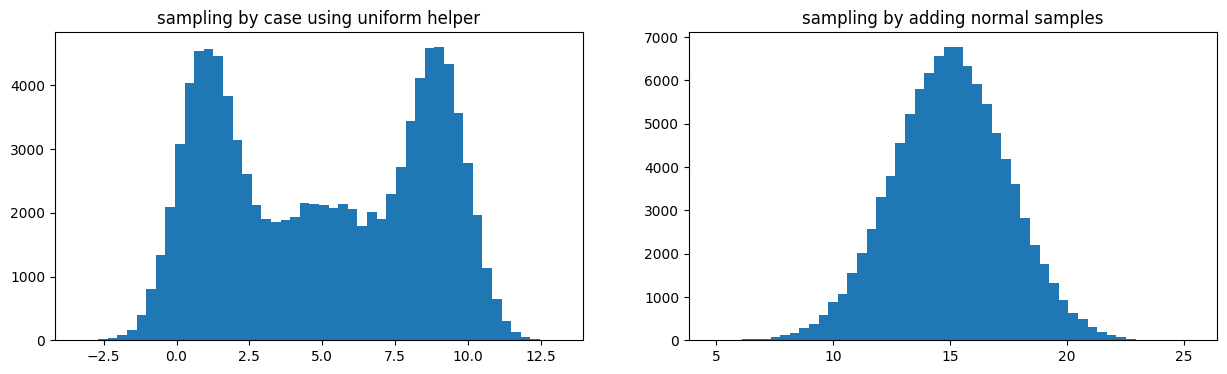

In [21]:
# draw samples from a uniform dist on 0,1

# if < 1/3          draw from norm dist 1
# if in (1/3, 2/3)  draw from norm dist 2
# else / if > 2/3   draw from norm dist 3

import numpy as np
import matplotlib.pyplot as plt

n = 100_000
means = [1,5,9]
std_devs = [1,2,1]

unif_temp = np.random.uniform(0,1,n)
gauss_mix_samp_1 = np.zeros(n)

for idx, unif in enumerate(unif_temp):
    if unif <= 1/3:
        gauss_mix_samp_1[idx] = np.random.normal(means[0], std_devs[0])
    elif unif > 2/3:
        gauss_mix_samp_1[idx] = np.random.normal(means[1], std_devs[1])
    else:
        gauss_mix_samp_1[idx] = np.random.normal(means[2], std_devs[2])

# different approach by sampling n realizations from each dist separately
# and adding them together

norm_samples_1 = np.random.normal(means[0], std_devs[0], n)
norm_samples_2 = np.random.normal(means[1], std_devs[1], n)
norm_samples_3 = np.random.normal(means[2], std_devs[2], n)

gauss_mix_samp_2 = norm_samples_1 + norm_samples_2 + norm_samples_3

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
ax1.hist(gauss_mix_samp_1, bins=50)
ax2.hist(gauss_mix_samp_2, bins=50)
ax1.set_title('sampling by case using uniform helper')
ax2.set_title('sampling by adding normal samples')
plt.show()
